## Import pandas so we can use this library 

In [2]:
import catheat
import numpy as np
import pandas as pd 

%matplotlib inline

### Import Metadata Values for 96W Plates 
values corresponding to wellID. Import with no index collumn set so that we can use the A-H collumn later for restructing the dataset.

Import values for buffer conditions 

In [3]:
nucleofection_buffer= pd.read_csv('lonza_nucleofection_buffer.csv') # read in csv 
nucleofection_buffer.head()
nucleofection_buffer.shape

FileNotFoundError: File b'lonza_nucleofection_buffer.csv' does not exist

In [4]:
catheat.heatmap(lonza_nucleofection_buffer_96w.set_index("Unnamed: 0"), palette='Set2')

NameError: name 'lonza_nucleofection_buffer_96w' is not defined

import values for experimental or control designation 


In [144]:
experimental_or_control_well= pd.read_csv('experimental_or_control.csv') # read in csv 
print(experimental_or_control_well.shape)
experimental_or_control_well

(8, 13)


,Unnamed: 0,1,2,3,4,5,6,7,8,9,10,11,12
0,A,exp,exp,exp,exp,exp,exp,exp,exp,exp,exp,exp,exp
1,B,exp,exp,exp,exp,exp,exp,exp,exp,exp,exp,exp,exp
2,C,exp,exp,exp,exp,exp,exp,exp,exp,exp,exp,exp,exp
3,D,exp,exp,exp,exp,exp,exp,exp,exp,exp,exp,exp,exp
4,E,exp,exp,exp,exp,exp,exp,exp,exp,exp,exp,exp,exp
5,F,exp,exp,exp,exp,exp,exp,exp,exp,exp,exp,exp,exp
6,G,exp,exp,exp,exp,exp,exp,exp,exp,exp,exp,exp,exp
7,H,exp,exp,exp,cntrl,exp,exp,exp,cntrl,exp,exp,exp,cntrl


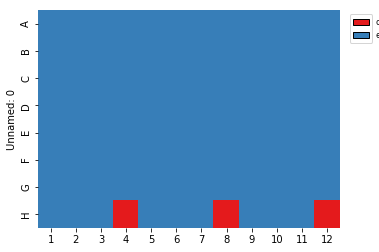

In [156]:
catheat.heatmap(experimental_or_control_well.set_index("Unnamed: 0"), palette='Set1')

### Change column names 
change unnamed: 0 to test_plate_96w_row_name (plate csv name _ row_names) so that we know that these indexes correspond to this plate. Do so by passing the name of the collumn to be renamed into a dictonary where you give the value of the name to be changed and the desired new name. 

### change name of experimental or control well 

In [81]:
experimental_or_control_well_renamed=experimental_or_control_well.rename(columns={"Unnamed: 0":"row_letter"})
print(experimental_or_control_well_renamed.shape)
print(experimental_or_control_well_renamed.head())

(8, 13)
  row_letter    1    2    3    4    5    6    7    8    9   10   11   12
0          A  exp  exp  exp  exp  exp  exp  exp  exp  exp  exp  exp  exp
1          B  exp  exp  exp  exp  exp  exp  exp  exp  exp  exp  exp  exp
2          C  exp  exp  exp  exp  exp  exp  exp  exp  exp  exp  exp  exp
3          D  exp  exp  exp  exp  exp  exp  exp  exp  exp  exp  exp  exp
4          E  exp  exp  exp  exp  exp  exp  exp  exp  exp  exp  exp  exp


### change name for loza nucleofection buffer

In [1]:
lonza_nucleofection_buffer_96w_renamed=lonza_nucleofection_buffer_96w.rename(columns={"Unnamed: 0":"row_letter"})
print(lonza_nucleofection_buffer_96w_renamed.shape)
lonza_nucleofection_buffer_96w_renamed.head()

NameError: name 'lonza_nucleofection_buffer_96w' is not defined

## Other option that did not work to ask Olga about

### Restructure the dataset based on the row labels of a 96 well plate. 
For the pd.melt function we take id_vars which is the variable for which we want get the values corresponding to other variables in the table. In this case, we want the values for all other variables, which are all other collumns, because we did not specify a specific subset of variables. If we wanted to specify this subset we could use value_vars and pass in a list of the other collumns (variables) that we want to see the values for relative to column 0. For example, if we only selected collumn 1, we would see the values at each position in the id_vars collumn from the corresponding index position in column 1. We can name these columns for clarity. 

### Print out information about new data frame
• `.shape` to get the dimensions of the dataframe. Here we have 96 rows and 3 collumns. This is because we are getting values from every collumn in the plate (12) for each of the 8 row labels (A-H) in collumn unnamed: 0. 

• `.head()` to view the first entries in the dataframe. This requires parenthasis in calling the attribute as .head is a function that can take in arguments and is not intrinsic to the data frame, in that you canspecify how many rows you want to see. 

• `.index or .index.values` to get the index range (0-96) which means it godes from 0 up to 95 not including 95 in steps of 1. or .index.values to get the actual values of the index, a list from 0-95. 

• `.columns` to get the collumn names. 

• `type()` with the dataframe as the argument to get the type of the object. In this case we check that the object is still a dataframe. This is important because there are certain ways of selecting from a dataframe where the sliced object, if only one column can become a series not a dataframe.

### tidy format of nucleofection buffer 

In [1]:
lonza_nucleofection_buffer_96w_renamed_tidy = pd.melt(lonza_nucleofection_buffer_96w_renamed, 
                            id_vars= "row_letter", 
                            var_name="column_num",
                            value_name="lonza_nucleofection_buffer") #restructure data

lonza_nucleofection_buffer_96w_renamed_tidy["well_id"] = lonza_nucleofection_buffer_96w_renamed_tidy.row_letter + \
    lonza_nucleofection_buffer_96w_renamed_tidy.column_num
print(lonza_nucleofection_buffer_96w_renamed_tidy.shape)
lonza_nucleofection_buffer_96w_renamed_tidy.head()



NameError: name 'pd' is not defined

### tidy format for experimental condition plate

In [95]:
experimental_or_control_well_renamed_tidy = pd.melt(experimental_or_control_well_renamed, 
                            id_vars= "row_letter", 
                            var_name="column_num",
                            value_name="experimental_or_control") #restructure data
experimental_or_control_well_renamed_tidy["well_id"] = experimental_or_control_well_renamed_tidy.row_letter + \
    experimental_or_control_well_renamed_tidy.column_num
print(experimental_or_control_well_renamed_tidy.shape)
experimental_or_control_well_renamed_tidy.head()


(96, 4)


,row_letter,column_num,experimental_or_control,well_id
0,A,1,exp,A1
1,B,1,exp,B1
2,C,1,exp,C1
3,D,1,exp,D1
4,E,1,exp,E1


## Merge tidy data frames 
notice that inner, outer, right and left did the same thing why?

In [98]:
merged_data = lonza_nucleofection_buffer_96w_renamed_tidy.merge(experimental_or_control_well_renamed_tidy, left_on="well_id" , right_on="well_id")
print(merged_data.shape)
merged_data.head()

(96, 7)


,row_letter_x,column_num_x,lonza_nucleofection_buffer,well_id,row_letter_y,column_num_y,experimental_or_control
0,A,1,Buffer_P1,A1,A,1,exp
1,B,1,Buffer_P1,B1,B,1,exp
2,C,1,Buffer_P1,C1,C,1,exp
3,D,1,Buffer_P1,D1,D,1,exp
4,E,1,Buffer_P1,E1,E,1,exp


In [68]:
merged_data_renamed=merged_data.rename(columns={"Unnamed: 0":"96_well_row_letter"})
print(merged_data_renamed.shape)
merged_data_renamed.head
merged_data_renamed

(96, 4)


,96_well_row_letter,column_num,lonza_nucleofection_buffer_well_value,experimental_or_control_well_well_value
0,A,1,Buffer_P1,exp
1,B,1,Buffer_P1,exp
2,C,1,Buffer_P1,exp
3,D,1,Buffer_P1,exp
4,E,1,Buffer_P1,exp
5,F,1,Buffer_P1,exp
6,G,1,Buffer_P1,exp
7,H,1,Buffer_P1,exp
8,A,2,Buffer_P1,exp
9,B,2,Buffer_P1,exp


In [141]:
experimental_or_control_well_renamed_tidy.head()

,row_letter,column_num,experimental_or_control,well_id
0,A,1,exp,A1
1,B,1,exp,B1
2,C,1,exp,C1
3,D,1,exp,D1
4,E,1,exp,E1


In [142]:
import numpy as np

experimental_or_control_well_renamed_tidy_shuffled = pd.DataFrame(experimental_or_control_well_renamed_tidy, 
                                                                  index=np.random.permutation(experimental_or_control_well_renamed_tidy.index))
experimental_or_control_well_renamed_tidy_shuffled.head()

,row_letter,column_num,experimental_or_control,well_id
83,D,11,exp,D11
12,E,2,exp,E2
33,B,5,exp,B5
94,G,12,exp,G12
17,B,3,exp,B3


In [143]:
merged_data = lonza_nucleofection_buffer_96w_renamed_tidy.merge(experimental_or_control_well_renamed_tidy_shuffled, 
                                                                left_on="well_id" , right_on="well_id")
print(merged_data.shape)
merged_data.head()

(96, 7)


,row_letter_x,column_num_x,lonza_nucleofection_buffer,well_id,row_letter_y,column_num_y,experimental_or_control
0,A,1,Buffer_P1,A1,A,1,exp
1,B,1,Buffer_P1,B1,B,1,exp
2,C,1,Buffer_P1,C1,C,1,exp
3,D,1,Buffer_P1,D1,D,1,exp
4,E,1,Buffer_P1,E1,E,1,exp


In [77]:
merged_data=lonza_nucleofection_buffer_96w_tidy.merge(experimental_or_control_well_tidy, left_on=["Unnamed: 0", "column_num"], right_on=["Unnamed: 0", "column_num"])
print(merged_data.shape)
merged_data

(96, 4)


,Unnamed: 0,column_num,lonza_nucleofection_buffer_well_value,experimental_or_control_well_well_value
0,A,1,Buffer_P1,exp
1,B,1,Buffer_P1,exp
2,C,1,Buffer_P1,exp
3,D,1,Buffer_P1,exp
4,E,1,Buffer_P1,exp
5,F,1,Buffer_P1,exp
6,G,1,Buffer_P1,exp
7,H,1,Buffer_P1,exp
8,A,2,Buffer_P1,exp
9,B,2,Buffer_P1,exp


## Merge on just one column
merge on row labels: this lists all the aligns the data so that the row labels are shared. For the left data frame the column labels are repeated and aligned with the unique column labled, from 1-12 for the right data frame. 

merge on column labels: this gives the first column for both of the data sets shared. For the left df it repeats that row lables (A-H) and gives a unqiue value A-H for the right data frame. 

In [65]:
merged_data=lonza_nucleofection_buffer_96w_tidy.merge(experimental_or_control_well_tidy, left_on=["Unnamed: 0"], right_on=["Unnamed: 0"])
print(merged_data.shape)
merged_data

(1152, 5)


,Unnamed: 0,column_num_x,lonza_nucleofection_buffer_well_value,column_num_y,experimental_or_control_well_well_value
0,A,1,Buffer_P1,1,exp
1,A,1,Buffer_P1,2,exp
2,A,1,Buffer_P1,3,exp
3,A,1,Buffer_P1,4,exp
4,A,1,Buffer_P1,5,exp
5,A,1,Buffer_P1,6,exp
6,A,1,Buffer_P1,7,exp
7,A,1,Buffer_P1,8,exp
8,A,1,Buffer_P1,9,exp
9,A,1,Buffer_P1,10,exp


In [66]:
merged_data=lonza_nucleofection_buffer_96w_tidy.merge(experimental_or_control_well_tidy, left_on=["column_num"], right_on=["column_num"])
print(merged_data.shape)
merged_data

(768, 5)


,Unnamed: 0_x,column_num,lonza_nucleofection_buffer_well_value,Unnamed: 0_y,experimental_or_control_well_well_value
0,A,1,Buffer_P1,A,exp
1,A,1,Buffer_P1,B,exp
2,A,1,Buffer_P1,C,exp
3,A,1,Buffer_P1,D,exp
4,A,1,Buffer_P1,E,exp
5,A,1,Buffer_P1,F,exp
6,A,1,Buffer_P1,G,exp
7,A,1,Buffer_P1,H,exp
8,B,1,Buffer_P1,A,exp
9,B,1,Buffer_P1,B,exp


## Joining well_type and buffers

In [103]:
cols_to_drop = ['row_letter', 'column_num']

buffers = lonza_nucleofection_buffer_96w_renamed_tidy.set_index("well_id")
buffers = buffers.drop(cols_to_drop, axis=1)
buffers.head()

,lonza_nucleofection_buffer
well_id,
A1,Buffer_P1
B1,Buffer_P1
C1,Buffer_P1
D1,Buffer_P1
E1,Buffer_P1


In [106]:
well_type = experimental_or_control_well_renamed_tidy.set_index("well_id")
well_type = well_type.drop(cols_to_drop, axis=1)
well_type.head()

,experimental_or_control
well_id,
A1,exp
B1,exp
C1,exp
D1,exp
E1,exp


In [11]:
joined=well_type.join(buffers)

NameError: name 'well_type' is not defined

In [133]:
import numpy as np

np.random.seed(0)


scrambled_wells = np.random.permutation(well_type.index)
scrambled_wells


array(['C4', 'E11', 'C1', 'H7', 'E9', 'B11', 'A3', 'G10', 'G7', 'C9', 'F7',
       'A12', 'H9', 'F2', 'H1', 'G4', 'G3', 'A4', 'B5', 'A2', 'D6', 'G8',
       'D1', 'G11', 'F6', 'A7', 'G1', 'H12', 'A11', 'D10', 'E8', 'H10',
       'F11', 'D12', 'D7', 'D4', 'C3', 'A8', 'H8', 'B10', 'B1', 'F8', 'C6',
       'B6', 'E1', 'H2', 'B3', 'A6', 'G5', 'F1', 'H11', 'D8', 'A1', 'C5',
       'E4', 'C7', 'D2', 'D5', 'H3', 'E7', 'C2', 'H4', 'B12', 'B8', 'E10',
       'A5', 'C11', 'G2', 'C10', 'D3', 'F4', 'B7', 'F12', 'G12', 'F9',
       'E3', 'C12', 'A10', 'F10', 'B4', 'F5', 'G6', 'H5', 'B9', 'C8', 'E2',
       'G9', 'E5', 'F3', 'D11', 'B2', 'E12', 'D9', 'A9', 'H6', 'E6'], dtype=object)

In [134]:
well_type_scrambled = well_type.loc[scrambled_wells]
well_type_scrambled.head()

,experimental_or_control
well_id,
C4,exp
E11,exp
C1,exp
H7,exp
E9,exp


In [135]:
well_type_scrambled.join(buffers)

,experimental_or_control,lonza_nucleofection_buffer
well_id,,
C4,exp,Buffer_P1
E11,exp,Buffer_P3
C1,exp,Buffer_P1
H7,exp,Buffer_P2
E9,exp,Buffer_P3
B11,exp,Buffer_P3
A3,exp,Buffer_P1
G10,exp,Buffer_P3
G7,exp,Buffer_P2


In [ ]:
wells_tidy['column_number'] = wells_tidy['Empty96ColNum'].astype(int)
print(wells_tidy.shape)
wells_tidy.head()

Wrong way! We did numbers, lettesr for `wells_tidy` and letters, numbers for `buffer_tidy`

In [ ]:
wells_tidy.merge(buffer_tidy, left_on=[ "Empty96ColNum", 'Unnamed: 0',], 
                 right_on=['row_letter', 'column_number'])

In [ ]:
wells_tidy.merge(buffer_tidy, left_on=['Unnamed: 0', "Empty96ColNum"], 
                 right_on=['row_letter', 'column_number'])

In [ ]:
wells_tidy.merge(buffer_tidy, left_on=['Unnamed: 0', "column_number"], 
                 right_on=['row_letter', 'column_number'])

In [ ]:
Empty96W_ColumnList.columns

In [ ]:
type(Empty96W_ColumnList)

In [ ]:
SelectValues_Empty96WellID=Empty96W_ColumnList.iloc[:,1] # select needed collumn 

In [ ]:
SelectValues_Empty96WellID

In [ ]:
SelectValues_Empty96WellID_df=SelectValues_Empty96WellID.to_frame() # turn series into df

In [ ]:
SelectValues_Empty96WellID_df

In [ ]:
type(SelectValues_Empty96WellID)

In [ ]:
Empty96W_ColumnList2=pd.melt(empty_96W, var_name="Empty96ColNum2",value_name="Empty96WellID2")

In [ ]:
SelectValues_Empty96WellID2=Empty96W_ColumnList2.iloc[:,1]

In [ ]:
SelectValues_Empty96WellID2

In [ ]:
SelectValues_Empty96WellID2_df=SelectValues_Empty96WellID2.to_frame()

In [ ]:
SelectValues_Empty96WellID2_df

In [ ]:
pd.concat([SelectValues_Empty96WellID_df,SelectValues_Empty96WellID2_df], axis=1)